ALUS: 755 images
AMI-traps: 315 images
AMT: 229 images
ArTaxOr: 2179 images
BIOSCAN: 1028 images
CollembolAI: 97 images
DIRT: 599 images
Diopsis: 142 images
DiversityScanner: 1077 images
Mothitor: 35 images
NHM-beetles-crops: 2981 images
PeMaToEuroPep: 583 images
abram2023: 59 images
amarathunga2022: 1139 images
anTraX: 436 images
biodiscover-arm: 192 images
cao2022: 218 images
gernat2018: 99 images
pinoy2023: 87 images
sittinger2023: 816 images
sticky-pi: 479 images
ubc-pitfall-traps: 155 images
ubc-scanned-sticky-cards: 52 images

TOTAL IMAGES ACROSS DATASETS: 13752

Saved → dataset_image_counts.json


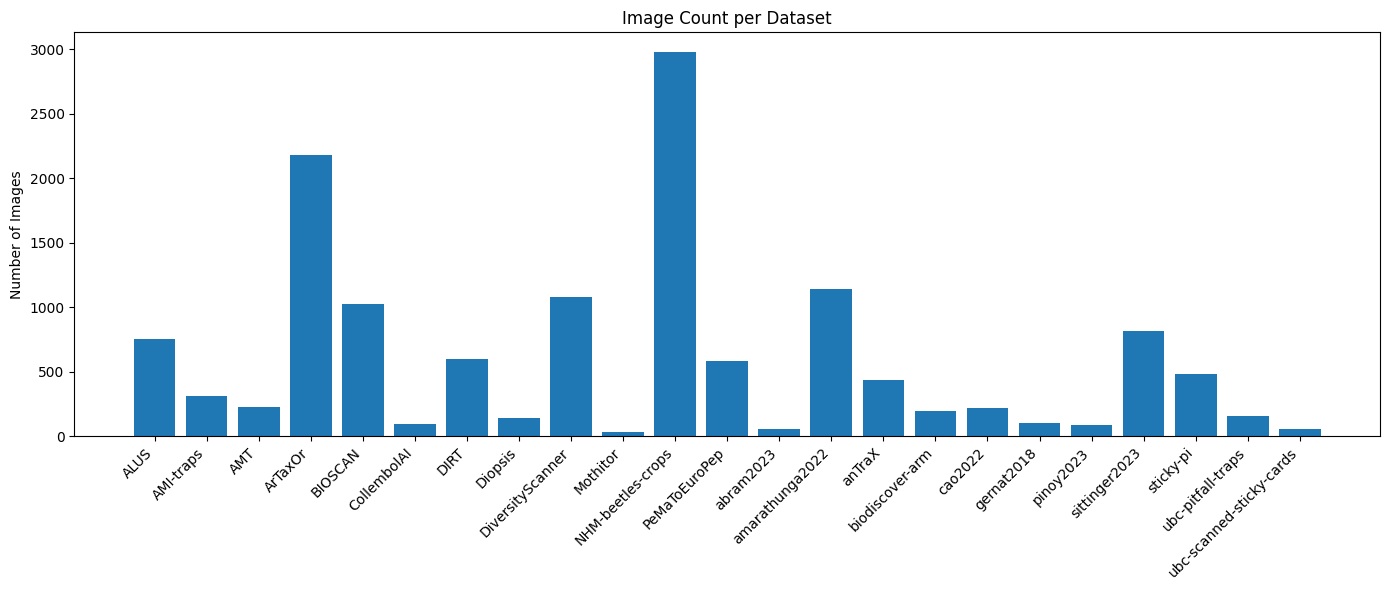

In [1]:
import os
import json
import matplotlib.pyplot as plt

# ==========================================
# CONFIG
# ==========================================
root_dataset = "./flatbug-dataset"

datasets_to_eval = {
    "abram2023",
    "ALUS",
    "amarathunga2022",
    "AMI-traps",
    "AMT",
    "anTraX",
    "ArTaxOr",
    "biodiscover-arm",
    "BIOSCAN",
    "cao2022",
    "CollembolAI",
    "Diopsis",
    "DIRT",
    "DiversityScanner",    
    "gernat2018",
    "Mothitor",
    "NHM-beetles-crops",
    "PeMaToEuroPep",
    "pinoy2023",
    "sittinger2023",
    "sticky-pi",
    "ubc-pitfall-traps",
    "ubc-scanned-sticky-cards"
}

# Image extensions
IMAGE_EXT = {".jpg", ".jpeg", ".png"}

# ==========================================
# COUNT IMAGES
# ==========================================
dataset_counts = {}

for dataset_name in sorted(datasets_to_eval):
    dataset_path = os.path.join(root_dataset, dataset_name)

    if not os.path.isdir(dataset_path):
        print(f"⚠️ Dataset missing: {dataset_name}")
        dataset_counts[dataset_name] = 0
        continue

    count = 0
    # recursive walk to count all image files
    for root, dirs, files in os.walk(dataset_path):
        for f in files:
            if os.path.splitext(f.lower())[1] in IMAGE_EXT:
                count += 1

    dataset_counts[dataset_name] = count
    print(f"{dataset_name}: {count} images")

total_images = sum(dataset_counts.values())
print("\nTOTAL IMAGES ACROSS DATASETS:", total_images)

# ==========================================
# SAVE TO JSON
# ==========================================
output = {
    "counts": dataset_counts,
    "total_images": total_images
}

with open("dataset_image_counts.json", "w") as f:
    json.dump(output, f, indent=4)

print("\nSaved → dataset_image_counts.json")

# ==========================================
# PLOT BAR CHART
# ==========================================
plt.figure(figsize=(14, 6))
plt.bar(dataset_counts.keys(), dataset_counts.values())
plt.xticks(rotation=45, ha="right")
plt.ylabel("Number of Images")
plt.title("Image Count per Dataset")
plt.tight_layout()
plt.show()


Scanning datasets in: ./flatbug-dataset

abram2023: 26 images
ALUS: 352 images
amarathunga2022: 550 images
AMI-traps: 153 images
AMT: 110 images
anTraX: 212 images
ArTaxOr: 1050 images
biodiscover-arm: 53 images
BIOSCAN: 501 images
cao2022: 60 images
CollembolAI: 43 images
Diopsis: 63 images
DIRT: 291 images
DiversityScanner: 529 images
gernat2018: 38 images
Mothitor: 12 images
NHM-beetles-crops: 729 images
PeMaToEuroPep: 284 images
pinoy2023: 76 images
sittinger2023: 400 images
sticky-pi: 476 images
ubc-pitfall-traps: 150 images
ubc-scanned-sticky-cards: 50 images
------------------------------
TOTAL IMAGES ACROSS DATASETS: 6208
------------------------------

Saved results to → dataset_image_counts.json


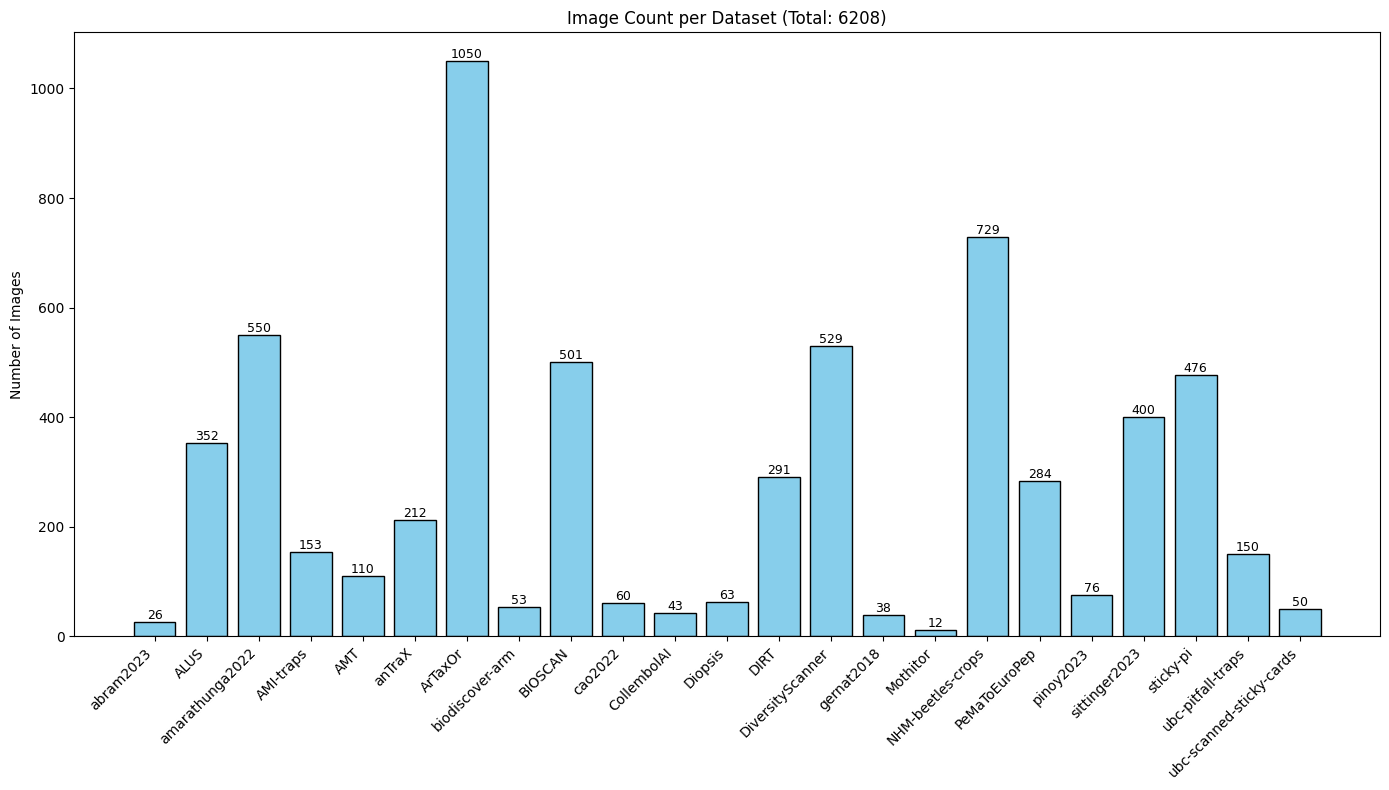

In [4]:
import os
import json
import matplotlib.pyplot as plt

# ==========================================
# CONFIG
# ==========================================
root_dataset = "./flatbug-dataset"

# CHANGED: Used a List [...] instead of a Set {...} to preserve order
datasets_to_eval = [
    "abram2023",
    "ALUS",
    "amarathunga2022",
    "AMI-traps",
    "AMT",
    "anTraX",
    "ArTaxOr",
    "biodiscover-arm",
    "BIOSCAN",
    "cao2022",
    "CollembolAI",
    "Diopsis",
    "DIRT",
    "DiversityScanner",    
    "gernat2018",
    "Mothitor",
    "NHM-beetles-crops",
    "PeMaToEuroPep",
    "pinoy2023",
    "sittinger2023",
    "sticky-pi",
    "ubc-pitfall-traps",
    "ubc-scanned-sticky-cards"
]

# Image extensions
IMAGE_EXT = {".jpg", ".jpeg", ".png"}

# ==========================================
# COUNT IMAGES (Top-level only)
# ==========================================
dataset_counts = {}

print(f"Scanning datasets in: {root_dataset}\n")

# Removed 'sorted()' to respect the list order
for dataset_name in datasets_to_eval:
    dataset_path = os.path.join(root_dataset, dataset_name)

    # Initialize count
    count = 0

    if not os.path.isdir(dataset_path):
        print(f"⚠️  Dataset missing: {dataset_name}")
        dataset_counts[dataset_name] = 0
        continue

    try:
        # os.listdir gets files in the current directory only (no subfolders)
        for f in os.listdir(dataset_path):
            file_path = os.path.join(dataset_path, f)
            
            # Check if it is a file (ignore directories)
            if os.path.isfile(file_path):
                # Check extension
                if os.path.splitext(f.lower())[1] in IMAGE_EXT:
                    count += 1
    except Exception as e:
        print(f"Error reading {dataset_name}: {e}")

    dataset_counts[dataset_name] = count
    print(f"{dataset_name}: {count} images")

# ==========================================
# TOTAL COUNT
# ==========================================
total_images = sum(dataset_counts.values())
print("-" * 30)
print(f"TOTAL IMAGES ACROSS DATASETS: {total_images}")
print("-" * 30)

# ==========================================
# SAVE TO JSON
# ==========================================
output = {
    "counts": dataset_counts,
    "total_images": total_images
}

json_filename = "dataset_image_counts.json"
with open(json_filename, "w") as f:
    json.dump(output, f, indent=4)

print(f"\nSaved results to → {json_filename}")

# ==========================================
# PLOT BAR CHART
# ==========================================
if total_images > 0:
    plt.figure(figsize=(14, 8))
    
    # Use the original list to ensure the plot order matches the print order
    names_for_plot = datasets_to_eval
    counts_for_plot = [dataset_counts[name] for name in names_for_plot]
    
    bars = plt.bar(names_for_plot, counts_for_plot, color='skyblue', edgecolor='black')
    
    # Add count labels on top of bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), 
                 va='bottom', ha='center', fontsize=9, rotation=0)

    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Number of Images")
    plt.title(f"Image Count per Dataset (Total: {total_images})")
    plt.tight_layout()
    plt.show()
else:
    print("No images found to plot.")